In [2]:
# Import the necessary libraries

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal.signaltools import lfilter
from scipy.io import wavfile
from IPython.display import Audio, display
from scipy.fftpack import fft,fftfreq, ifft

plt.rc('figure', figsize=[25,8])

# **Filters**

Filters are **widely** used and very important in Digital Signal Processing. They have 2 main uses:
- Signal Seperation **|** When a signal has been **contaminated** with other (un)wanted signals
    - Extraction of a *specific signal* that has been combined with other signals 
    - Removal of *external noise* from the main signal
- Signal Restoration **|** When a signal has been **destorted** in some way

Each filter has **one input signal** and **one output** signal, as indicated below:

<div>
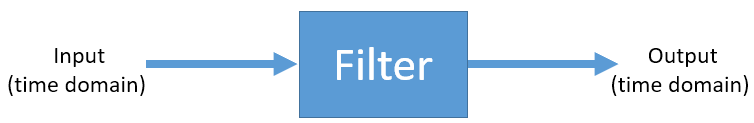
</div>

### Types of Filters
There are 4 basic types of filters, based on the **frequency range** of interest:

- Low-pass | Blocks higher frequencies
- High-pass | Blocks lower frequencies 
- Band-pass | Blocks frequencies **out** of a specific range
- Band-stop | Blocks frequencies **between** a specific range

Run the code below to see some examples of the different types of filters!

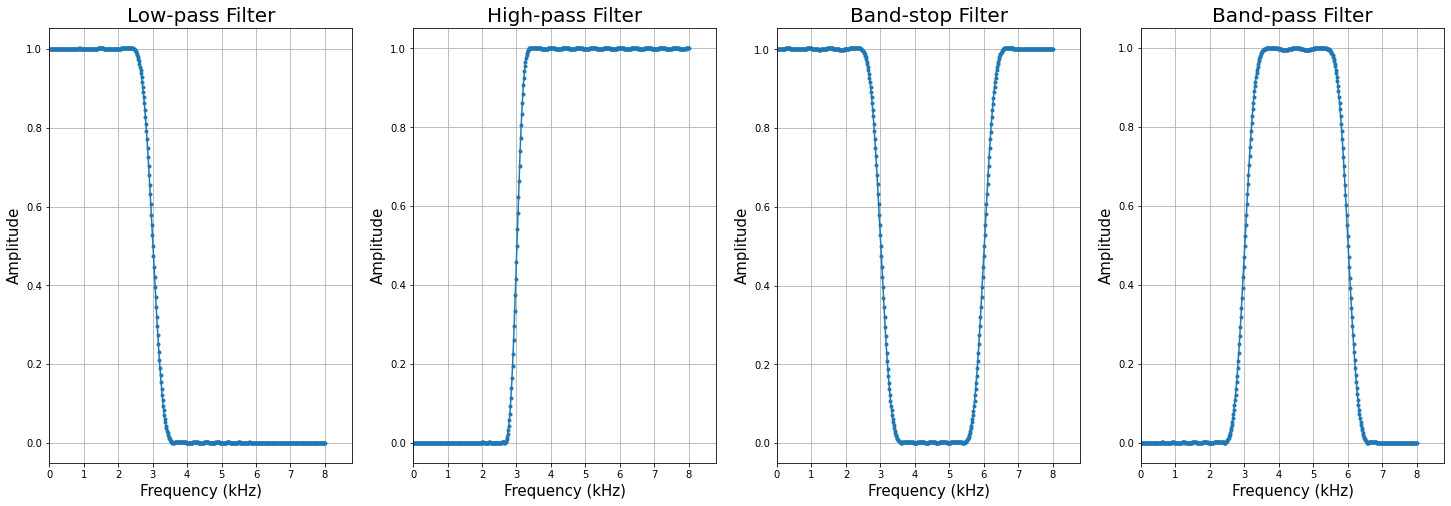

In [3]:
# Implementation of different filter types 

# You can increase/ decrease the number of taps and observe the effect in the generated filters.

# ========================= LOW PASS FILTER =========================
taps_number = 51
cut_off_frequency = 3000 # Hz
sample_rate = 16000 # Hz

h = signal.firwin(taps_number, cut_off_frequency, fs=sample_rate, pass_zero="lowpass")

H = np.abs(np.fft.fft(h, 1024)) 
H = np.fft.fftshift(H)
w = np.linspace(-sample_rate/2, sample_rate/2, len(H))

# Plot the frequency response
plt.subplot(141)
plt.plot(w/1000, H, '.-')
plt.xlabel('Frequency (kHz)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.xlim(0)
plt.title('Low-pass Filter', fontsize=20)
plt.grid(True)

# ========================= HIGH PASS FILTER =========================
taps_number = 81 
cut_off_frequency = 3000 # Hz
sample_rate = 16000 # Hz

h = signal.firwin(taps_number, cut_off_frequency, fs=sample_rate, pass_zero="highpass")

H = np.abs(np.fft.fft(h, 1024)) 
H = np.fft.fftshift(H)
w = np.linspace(-sample_rate/2, sample_rate/2, len(H))

# Plot the frequency response
plt.subplot(142)
plt.plot(w/1000, H, '.-')
plt.xlabel('Frequency (kHz)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.xlim(0)
plt.title('High-pass Filter', fontsize=20)
plt.grid(True)

# ========================= BAND STOP FILTER =========================

taps_number = 51
cut_off_frequency = [3000, 6000] # Hz
sample_rate = 16000 # Hz

h = signal.firwin(taps_number, cut_off_frequency, fs=sample_rate, pass_zero="bandstop")

H = np.abs(np.fft.fft(h, 1024)) 
H = np.fft.fftshift(H)
w = np.linspace(-sample_rate/2, sample_rate/2, len(H))

# Plot the frequency response
plt.subplot(143)
plt.plot(w/1000, H, '.-')
plt.xlabel('Frequency (kHz)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.xlim(0)
plt.title('Band-stop Filter', fontsize=20)
plt.grid(True)

# ========================= BAND PASS FILTER =========================

taps_number = 51
cut_off_frequency = [3000, 6000] # Hz
sample_rate = 16000 # Hz

h = signal.firwin(taps_number, cut_off_frequency, fs=sample_rate, pass_zero="bandpass")

H = np.abs(np.fft.fft(h, 1024)) 
H = np.fft.fftshift(H)
w = np.linspace(-sample_rate/2, sample_rate/2, len(H))

# Plot the frequency response
plt.subplot(144)
plt.plot(w/1000, H, '.-')
plt.xlabel('Frequency (kHz)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.xlim(0)
plt.title('Band-pass Filter', fontsize=20)
plt.grid(True)

### **Example of Filter Application**

In the figures below after applying a *low-pass filter* in the received signal, we can observe that the unwanted frequencies have been **attenuated**.

<div>
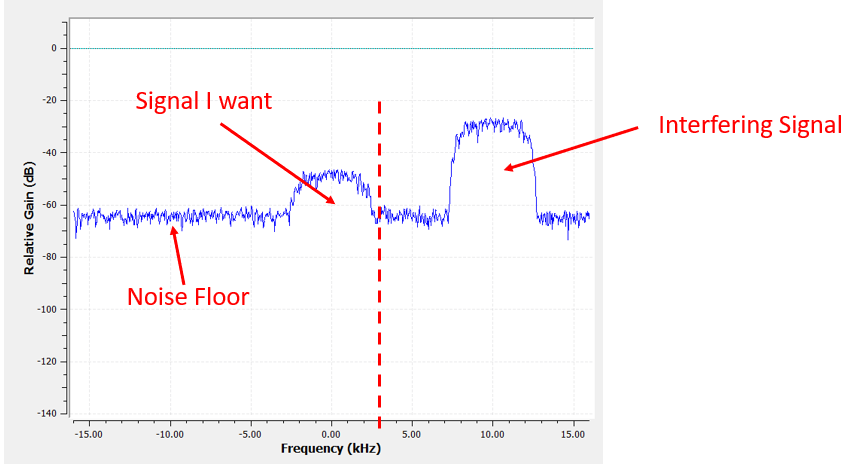
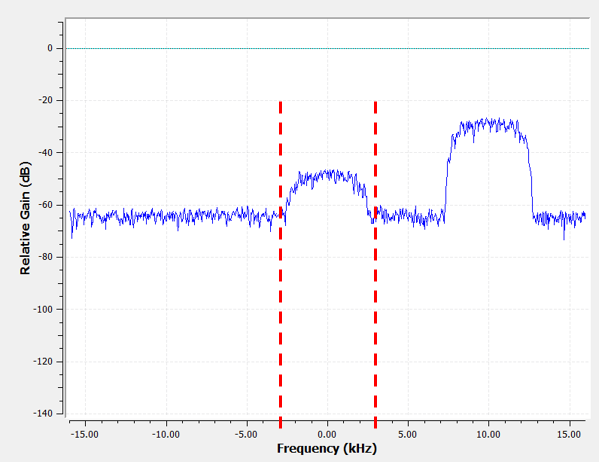
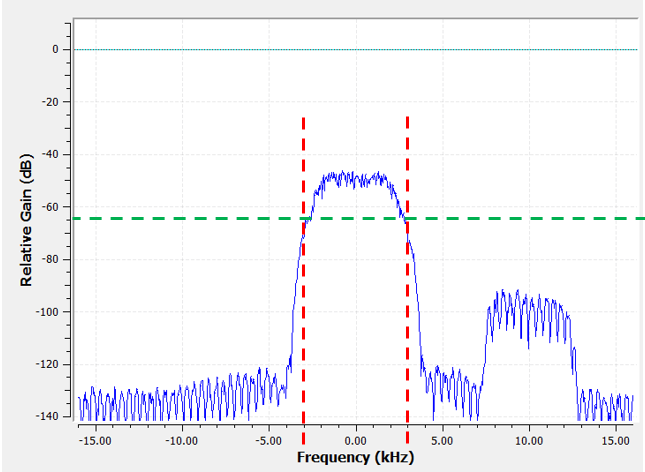
</div>


### Algorithmic Implementations of Filters

There are two main algorithmic implementatios of DSP Filters: 

- Finite Impulse Response Filters (aka FIR)
- Infinite Impulse Response Filters (aka IIR)

Both implementations have their advantages and disadvantages, however this is out of this workshop's scope. 

Today, we will learn about the **FIR** Filters. 


### FIR Filters (Finite Impulse Response)

Some basic characteristics of an FIR filter are explained below:

`numtaps` : The length of the filter / The number of its coefficients called "taps"

`cutoff`  : The cutoff frequency 

`fs`      : The sampling frequency of the signal. Each frequency in cutoff must be between 0 and fs/2, according to Nyquist theorem.

### **Basic FIR Filter Diagram:**

<div>
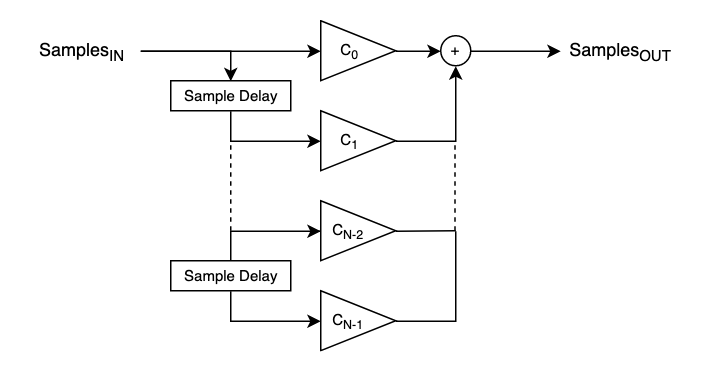
</div>

`C0, C1, ..., CN-1` : the filter taps

This is a `N` length FIR filter with `N` taps and `N-1` sample delay elements. 

The filter **order** is `N-1`.

# Let's implement our own filter!

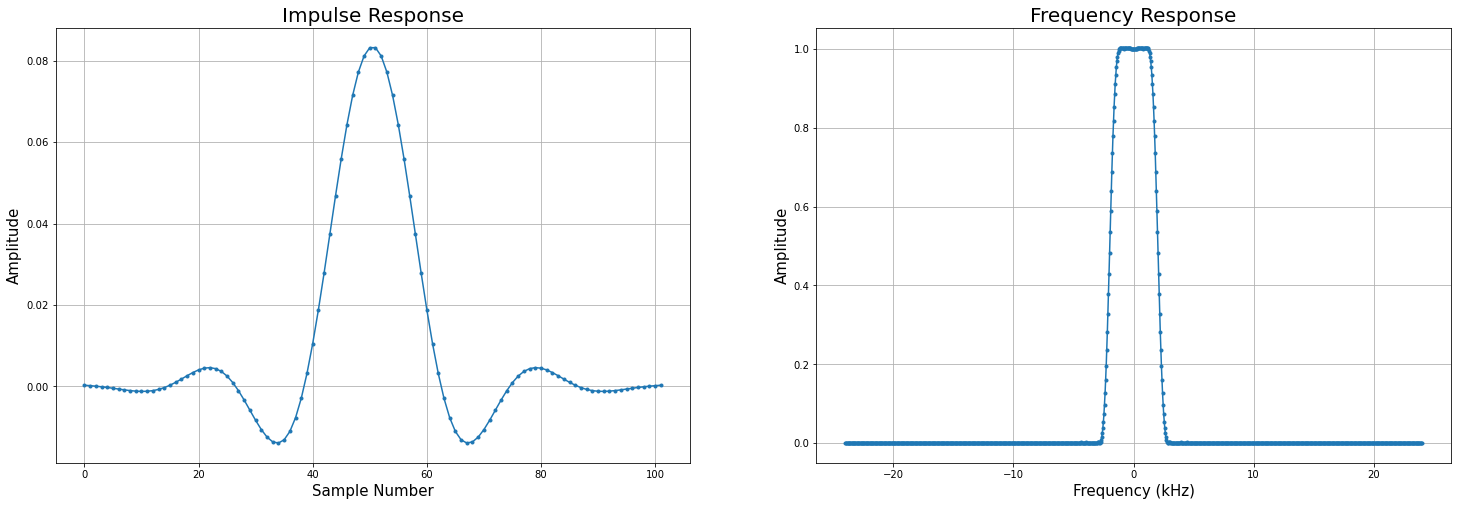

In [47]:
# ========================= FIR Filter ==================== #

taps_number = 102 # Prefer odd number of taps
cut_off_frequency = 2000 # Hz
sample_rate = 48000 # Hz

# Generate low pass filter
# Returns the filter's impulse response coefficients
# cutt_off_frequency must be between 0 and fs/2
h = signal.firwin(taps_number, cut_off_frequency, fs=sample_rate)
# Plot the impulse response
plt.subplot(121)
plt.plot(h, '.-')
plt.xlabel('Sample Number', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.title('Impulse Response', fontsize=20)
plt.grid(True)

# Calculate the frequency response
H = np.abs(np.fft.fft(h, 1024)) # Take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # Make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H))

# Plot the frequency response
plt.subplot(122)
plt.plot(w/1000, H, '.-')
plt.xlabel('Frequency (kHz)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.title('Frequency Response', fontsize=20)
plt.grid(True)

### **We will now shift the filter to a different frequency.**


Each filter may have *complex* or *real* taps.

**Real** taps are used only when the filter’s frequency response is *symmetrical around DC (0 Hz)*.

**Complex** taps are used in *non symetrical* signals and signals *symmetrical around any other frequency*.

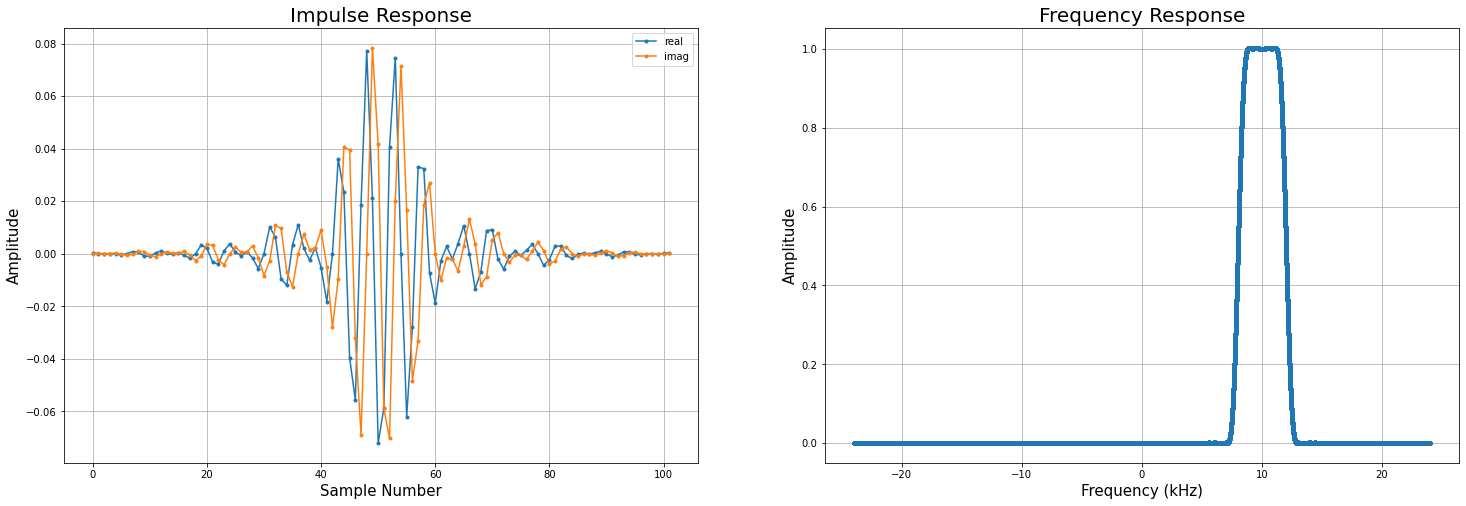

In [52]:
# Shift the filter in frequency by multiplying by exp(j*2*pi*f0*t)

f0 = sample_rate/4.8 # Center frequency (Hz)
Ts = 1.0/sample_rate # Sample period
t = np.arange(0.0, Ts*len(h), Ts) # time vector. args are (start, stop, step)
exponential = np.exp(2j*np.pi*f0*t) # this is essentially a complex sine wave

h_band_pass = h * exponential # Shift the filter

# Plot impulse response
plt.subplot(121)
plt.plot(np.real(h_band_pass), '.-')
plt.plot(np.imag(h_band_pass), '.-')
plt.legend(['real', 'imag'], loc=1)
plt.xlabel('Sample Number', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.title('Impulse Response', fontsize=20)
plt.grid(True)

# Plot the frequency response
H = np.abs(np.fft.fft(h_band_pass, 384000)) 
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis
plt.subplot(122)
plt.plot(w/1000, H, '.-')
plt.xlabel('Frequency (kHz)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.title('Frequency Response', fontsize=20)
plt.grid()

## **Filter Application**

Let's now try to remove the parasitic frequency from the audio file we recorder earlier.

In [53]:
# Listen to the audio file
audio = Audio(filename='./corrupted.wav')
display(audio)

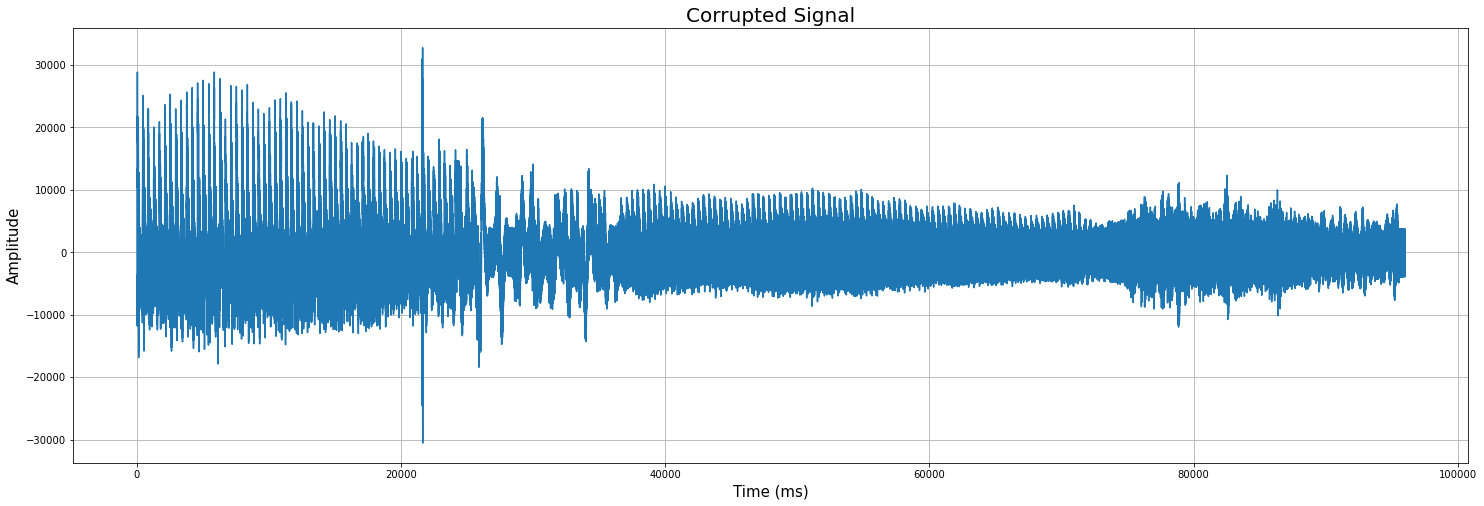

In [54]:
# Read the audio file
samplerate, data = wavfile.read("corrupted.wav")
samples = data.shape[0]

# Plot the audio signal
plt.plot(data)
plt.xlabel('Time (ms)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.title('Corrupted Signal', fontsize=20)
plt.grid()

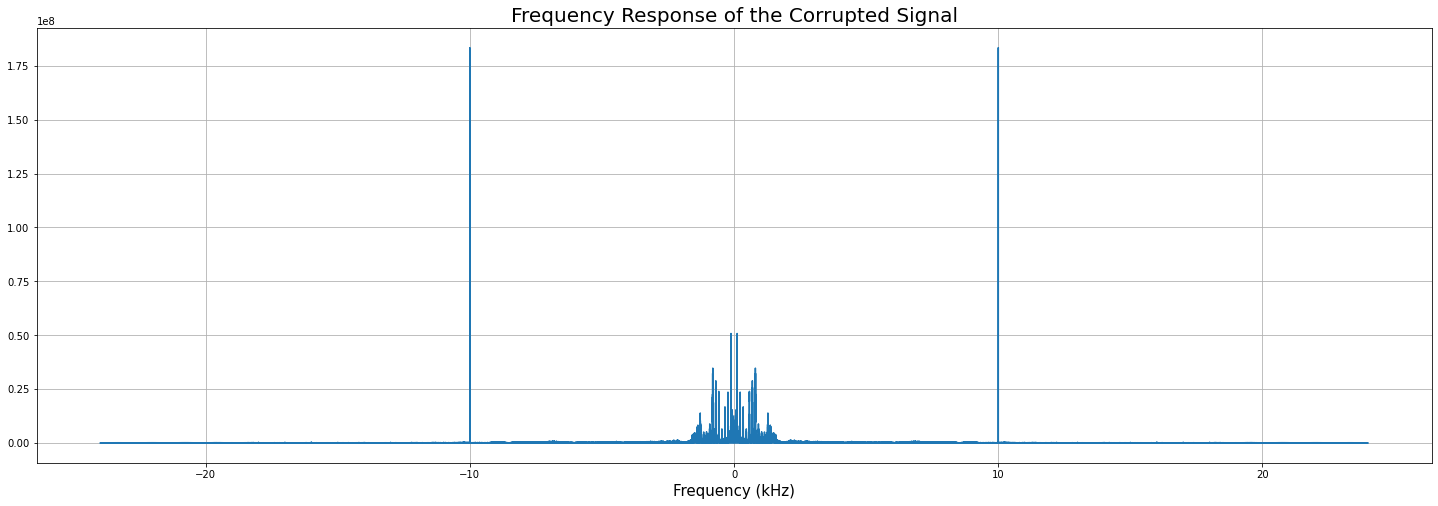

In [55]:
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)

# Plot the Frequency Response of the signal
plt.plot(freqs/1000,fftabs)
plt.xlabel('Frequency (kHz)', fontsize=15)
plt.title('Frequency Response of the Corrupted Signal', fontsize=20)
plt.grid()

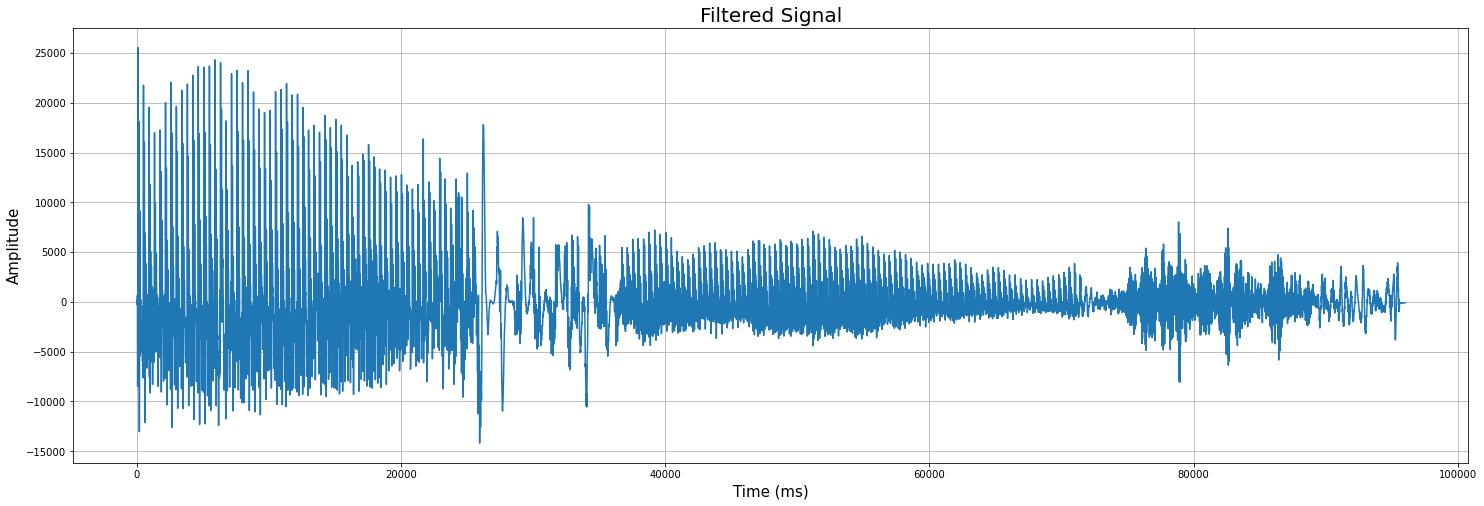

In [59]:
# Apply the filter to the signal
filtered_signal = lfilter(h, 1.0, data)
normalized_filtered_signal = np.int16((filtered_signal / filtered_signal.max()) * 32767)
# Write the filtered signal to an audio file
wavfile.write("filtered.wav", samplerate, normalized_filtered_signal)
# Plot the filtered signal in time domain
plt.plot(filtered_signal)
plt.xlabel('Time (ms)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.title('Filtered Signal', fontsize=20)
plt.grid()

In [60]:
# Listen to the filtered signal
audio = Audio(filename='./filtered.wav')
display(audio)

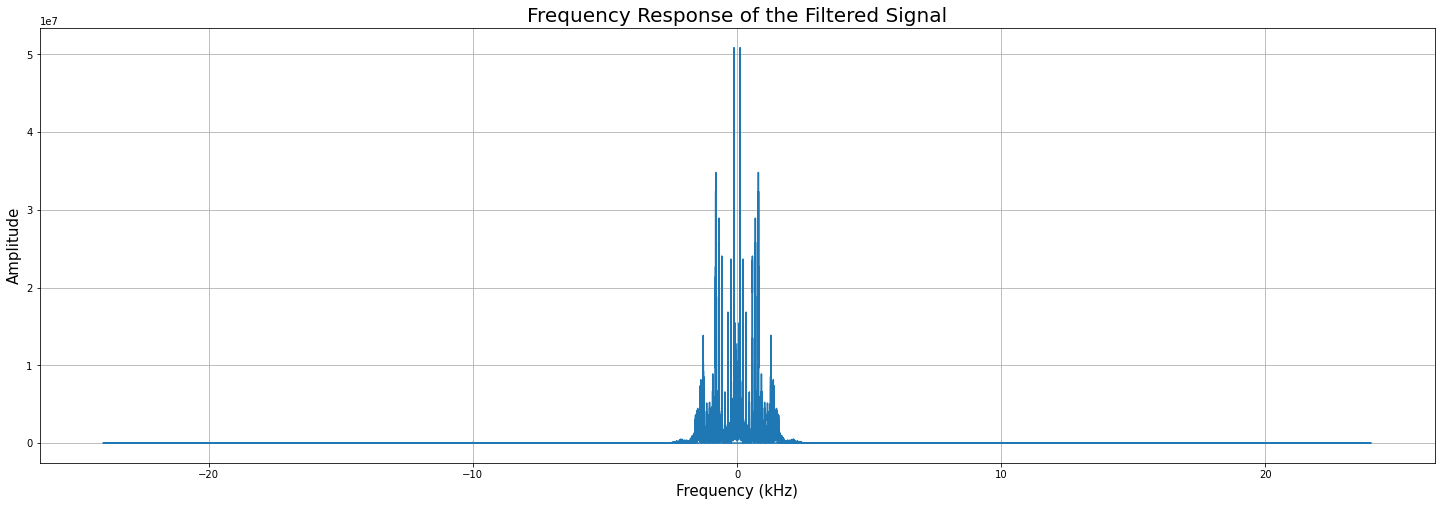

In [62]:
# Convert the filtered signal in the frequency domain
fft_filtered = fft(filtered_signal)
fftabs = abs(fft_filtered)
freqs = fftfreq(samples,1/samplerate)

# Plot the Frequency Response of the filtered signal
plt.plot(freqs/1000,fftabs)
plt.xlabel('Frequency (kHz)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.title('Frequency Response of the Filtered Signal', fontsize=20)
plt.grid()

**Source:**

https://pysdr.org/content/filters.html#